In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values

print("Length of X and y:", len(X), len(y))

Length of X and y: 400 400


In [4]:
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Euclidean distance
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = classifier.predict(X_test)
print("Predicted values:\n", y_pred)

Predicted values:
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[55  3]
 [ 1 21]]


In [9]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))
print("\nClassification Report:\n",metrics.classification_report(y_test,y_pred))

Accuracy: 0.95
Precision: 0.875
Recall: 0.9545454545454546
F1_Score: 0.9130434782608695

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



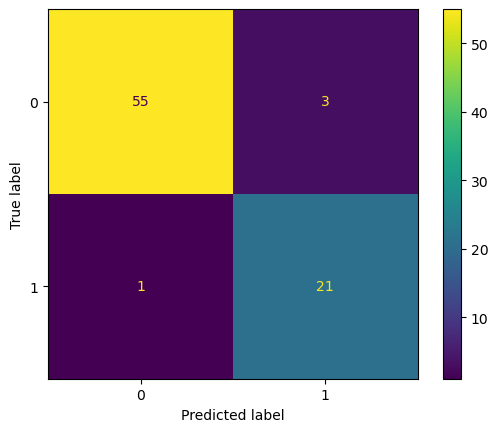

In [10]:
labels = ["0", "1"]
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
                        